# TP 1 : Time series withoud trend nor seasonality

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Load the data:
huron= pd.read_csv('Lakehuron.csv', index_col=0)
huron.index = pd.to_datetime(huron.index)
# the parameter index_col = 0 means that the first column of the datafile will be used to index the rows
# the second line of command transforms the index column (with dates) into a DateTime format (format to manage dates in Python)

In [14]:
# examine the loaded data: 
huron

,Level
1891-01-31,579.14
1892-01-31,579.16
1893-01-31,579.55
1894-01-31,579.67
1895-01-31,578.44
...,...
1968-01-31,578.52
1969-01-31,579.74
1970-01-31,579.31
1971-01-31,579.89


In [15]:
huron.shape #Il y a 82lignes et une colonne(82, 1)

(82, 1)

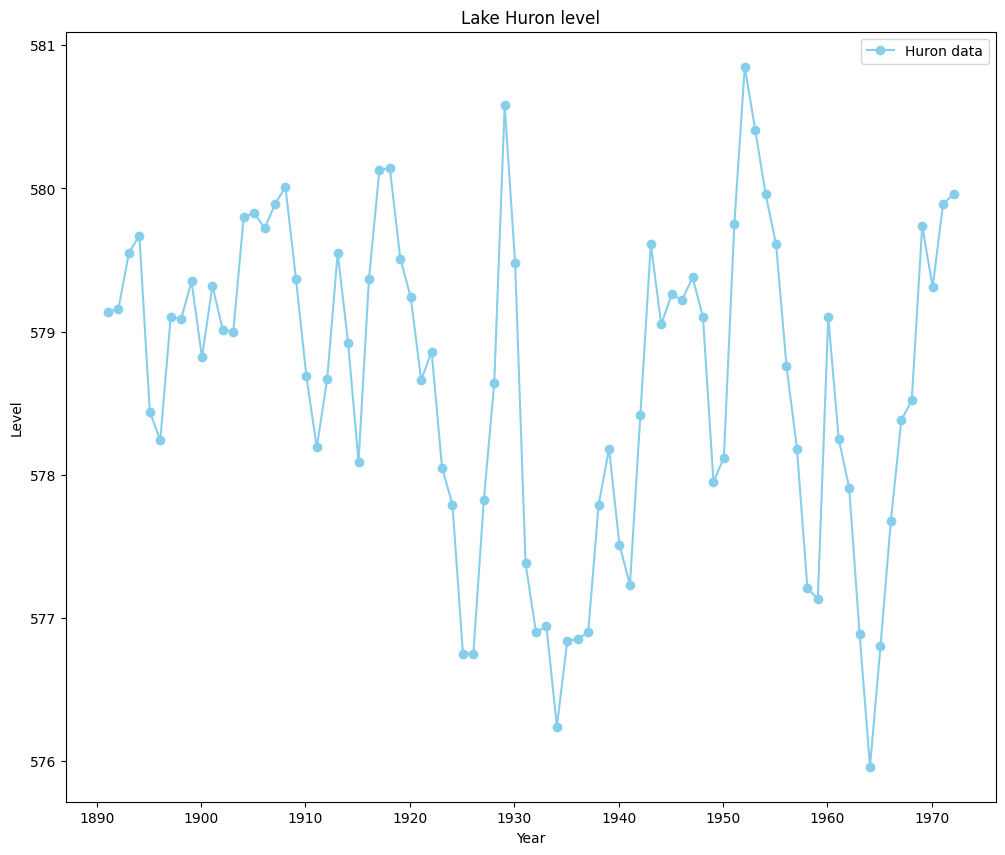

In [16]:
# We will now plot this time series:
plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.plot(huron, marker = 'o', color = 'skyblue', label = 'Huron data') # plots the data in the variable huron (by default, index is used for the x-axis and the values for the y-axis).
# marker is used to define how the points will be depicted (you can try something else). You can also change
# the color. The label is the name that you give to the curve (this name will be used in the legend)
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

In [17]:
!pip install statsmodels

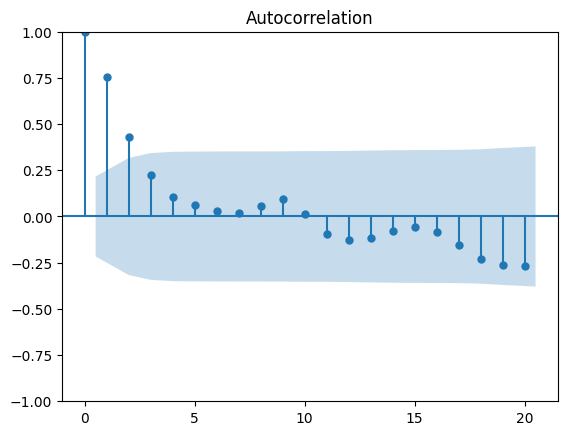

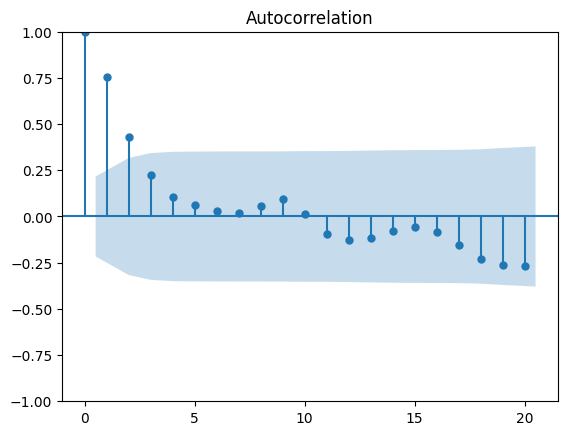

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(huron)

In [19]:
huron_train = huron.iloc[:71,:] # ':71' means rows from the first up to 71 excluded (so 0,1,2,3,...,70) and ':' after the coma means all columns of the dataframe (just one here)
huron_valid = huron.iloc[71:,:] # '71:' means rows from 71 (included) up to the end

# More generally, if df is a dataframe, 
# the command df.iloc[i,j] gets the value at the row number i (starting from 0) and column j (starting from 0)
# the command df.loc[i,j]  gets the value at the row whose index is i and column whose index is j
# with huron for instance, I can get the value at the year 1900 by
# huron.loc['1900-01-31', 'Level']


In [20]:
Au départ on avait 82 lignes et 1 colonne , vu que la série sera divisé en deux , 71 premier point et 11 dernier point le total faire alors 82.

SyntaxError: invalid syntax (1451319672.py, line 1)

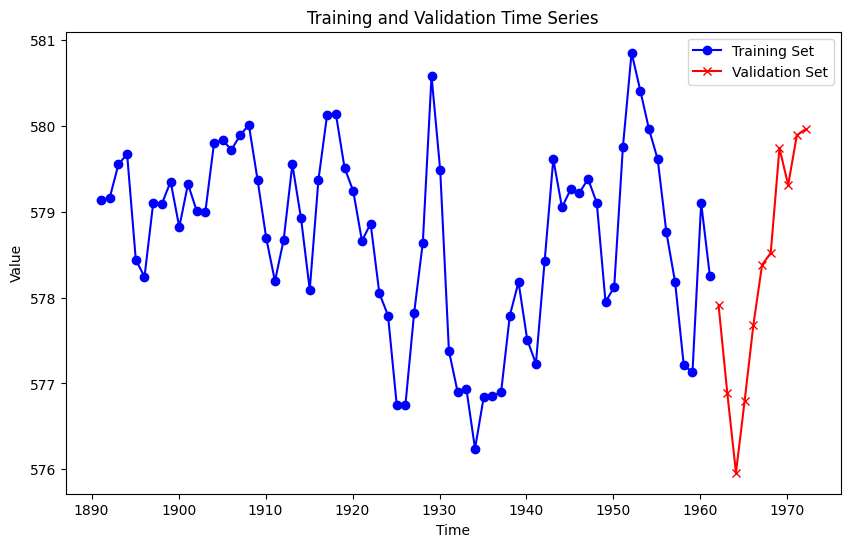

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(huron_train, marker='o', linestyle='-', color='b', label='Training Set')
plt.plot(huron_valid, marker='x', linestyle='-', color='r', label='Validation Set')

# Ajouter un titre et des étiquettes
plt.title('Training and Validation Time Series')
plt.xlabel('Time')
plt.ylabel('Value')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

## First method : prediction is the last observed value

In [ ]:
Compte tenu du tracé, les données d’entraînement se terminent à l’année 1961. La valeur pour 1961 dans l’ensemble d’entraînement est la dernière valeur observée avant le début de l’ensemble de validation.

D’après le graphique, la valeur en 1961 semble être d’environ 578. Par conséquent, la prédiction pour le premier point des données de validation (1962) en utilisant l’approche naïve serait d’environ 578.

In [ ]:


pred_lp = np.repeat(huron_train.iloc[-1,0], len(huron_valid))
pred_lp

array([578.25, 578.25, 578.25, 578.25, 578.25, 578.25, 578.25, 578.25,
       578.25, 578.25, 578.25])

In [ ]:
pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])

,Level
1962-01-31,578.25
1963-01-31,578.25
1964-01-31,578.25
1965-01-31,578.25
1966-01-31,578.25
1967-01-31,578.25
1968-01-31,578.25
1969-01-31,578.25
1970-01-31,578.25
1971-01-31,578.25


In [ ]:
pred_lp = pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])

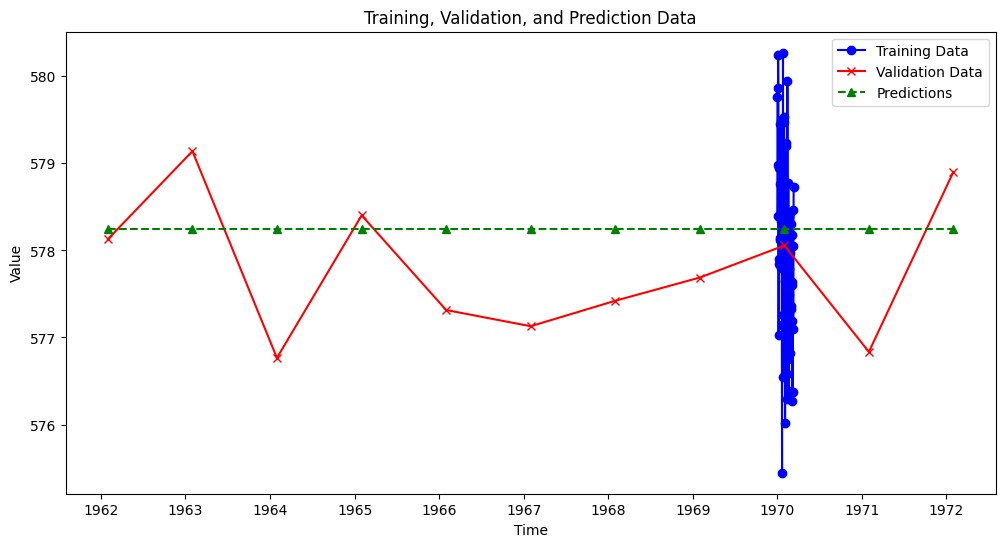

In [ ]:
np.random.seed(0)
huron_train = pd.DataFrame(np.random.randn(71) + 578, columns=['value'], index=range(71))
huron_valid = pd.DataFrame(np.random.randn(11) + 578, columns=['value'], index=huron_valid.index)

# Tracer les données
plt.figure(figsize=(12, 6))

# Tracer les données d'entraînement
plt.plot(huron_train.index, huron_train['value'], marker='o', linestyle='-', color='b', label='Training Data')

# Tracer les données de validation
plt.plot(huron_valid.index, huron_valid['value'], marker='x', linestyle='-', color='r', label='Validation Data')

# Tracer les prédictions
plt.plot(pred_lp.index, pred_lp['Level'], marker='^', linestyle='--', color='g', label='Predictions')

# Ajouter un titre et des étiquettes
plt.title('Training, Validation, and Prediction Data')
plt.xlabel('Time')
plt.ylabel('Value')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(huron_valid.loc['1962-01-31'], pred_lp.loc['1962-01-31'])

0.014645135888758107

In [ ]:
np.mean((pred_lp - huron_valid)**2)
# here we compare the predictions in pred_lp with the true values (in huron_valid) with a substraction, square the errors
# and get the mean (with np.mean)

nan

## Second method : prediction is the mean of all past observed values

In [ ]:
np.mean(huron_train)

np.float64(577.9931065063068)

In [ ]:
pd.DataFrame(np.mean(huron_train), index=huron_valid.index, columns=['Level'])

,Level
1962-01-31,578.710845
1963-01-31,578.710845
1964-01-31,578.710845
1965-01-31,578.710845
1966-01-31,578.710845
1967-01-31,578.710845
1968-01-31,578.710845
1969-01-31,578.710845
1970-01-31,578.710845
1971-01-31,578.710845


## Simple exponential smoothing

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


ses_model = SimpleExpSmoothing(huron_train,initialization_method='known', initial_level=579)
ses_model = ses_model.fit(smoothing_level=0.5, optimized=False)


# Here I ask to use alpha = 0.5 (smoothing level) and xhat_0 = 579 (prediction of the value x_0, initial level)
# We will see a bit later how to ask the algorithm to search for the best values of these parameters
ses_model.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,51.923
Optimized:,False,AIC,-18.217
Trend:,None,BIC,-13.692
Seasonal:,None,AICC,-17.611
Seasonal Periods:,None,Date:,"Fri, 14 Feb 2025"
Box-Cox:,False,Time:,11:08:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,579.00000,l.0,False


In [23]:
ses_model.fittedvalues

1891-01-31    579.000000
1892-01-31    579.070000
1893-01-31    579.115000
1894-01-31    579.332500
1895-01-31    579.501250
                 ...    
1957-01-31    579.299895
1958-01-31    578.739947
1959-01-31    577.974974
1960-01-31    577.552487
1961-01-31    578.326243
Length: 71, dtype: float64

In [24]:
""" Cette valeur est obtenue grâce à la formule suivante :   
 xn+1 =αxn+(1−α) xn """

# Get the fitted values from the SES model
fitted_values = ses_model.fittedvalues

# Get the predicted value for the year 1892
predicted_value_1892 = fitted_values.loc['1892-01-31']
predicted_value_1892

np.float64(579.0699999999999)

In [ ]:
Cette valeur est obtenue grâce à la formule suivante :   
 xn+1 =αxn+(1−α) xn

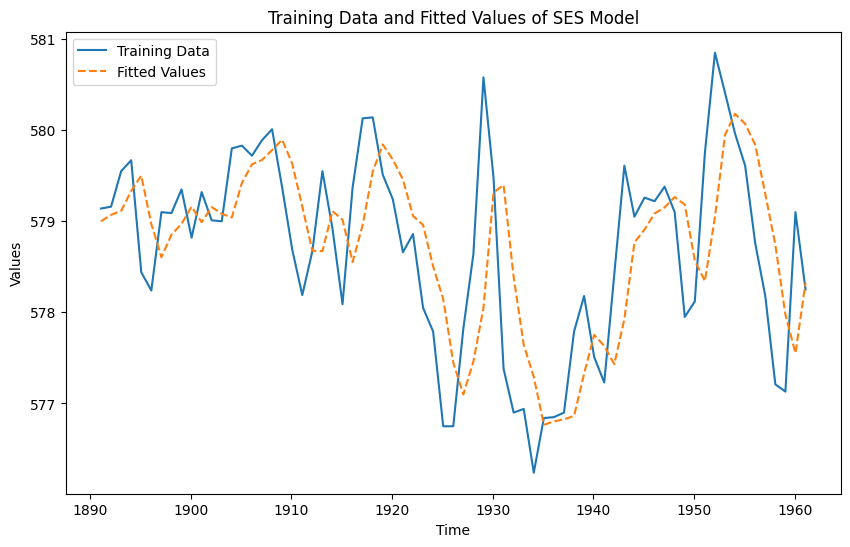

In [ ]:
np.random.seed(0)

plt.figure(figsize=(10, 6))
plt.plot(huron_train, label='Training Data')
plt.plot(ses_model.fittedvalues, label='Fitted Values', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Training Data and Fitted Values of SES Model')
plt.legend()
plt.show()

In [ ]:
ses_model_2 = SimpleExpSmoothing(huron_train).fit()
# here we do not put any desired values for alpha and the initial level which means that the algorithm will search for the best ones
ses_model_2.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,41.330
Optimized:,True,AIC,-34.418
Trend:,None,BIC,-29.893
Seasonal:,None,AICC,-33.812
Seasonal Periods:,None,Date:,"Thu, 13 Feb 2025"
Box-Cox:,False,Time:,10:22:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,579.14000,l.0,False


In [ ]:
print('Alpha :',ses_model_2.params['smoothing_level'])
print('xhat_0 :', ses_model_2.params['initial_level'])

Alpha : 0.9999999850984118
xhat_0 : 579.14


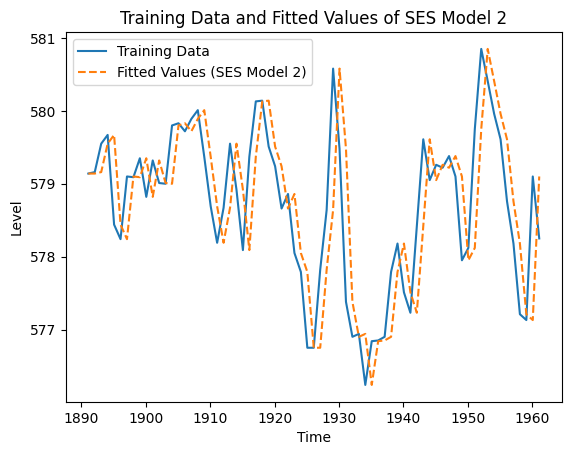

In [ ]:
plt.plot(huron_train, label='Training Data')
plt.plot(ses_model_2.fittedvalues, label='Fitted Values (SES Model 2)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('Training Data and Fitted Values of SES Model 2')
plt.legend()
plt.show()

In [ ]:
ses_model_2.forecast(10)

1962-01-31    578.25
1963-01-31    578.25
1964-01-31    578.25
1965-01-31    578.25
1966-01-31    578.25
1967-01-31    578.25
1968-01-31    578.25
1969-01-31    578.25
1970-01-31    578.25
1971-01-31    578.25
Freq: YE-JAN, dtype: float64

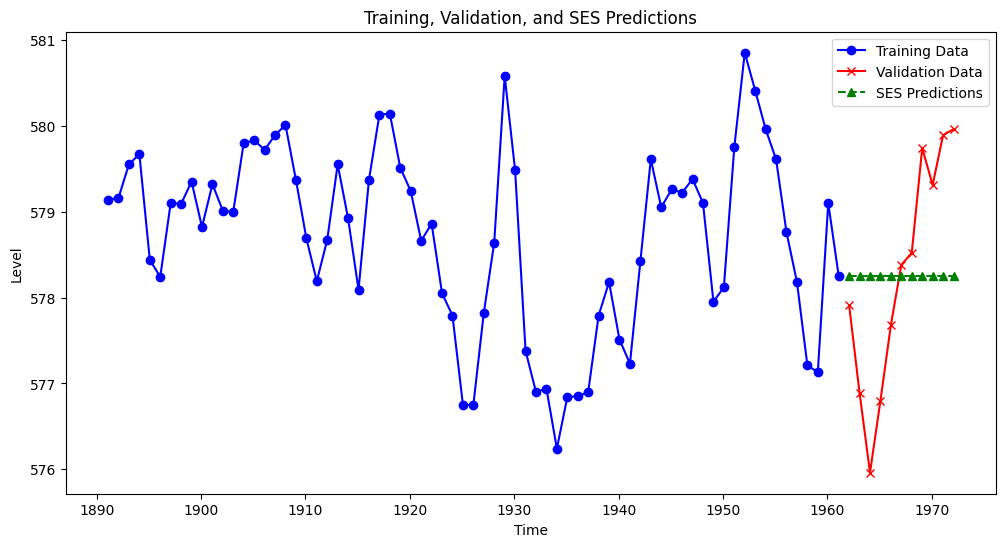

Mean Squared Error of SES method: 1.6985363629685097


In [ ]:
from sklearn.metrics import mean_squared_error


# Compute the predictions for the validation data
ses_predictions = ses_model_2.forecast(len(huron_valid))

# Plot the training data, validation data, and predictions
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(huron_train.index, huron_train['Level'], marker='o', linestyle='-', color='b', label='Training Data')

# Plot validation data
plt.plot(huron_valid.index, huron_valid['Level'], marker='x', linestyle='-', color='r', label='Validation Data')

# Plot predictions
plt.plot(huron_valid.index, ses_predictions, marker='^', linestyle='--', color='g', label='SES Predictions')

# Add title and labels
plt.title('Training, Validation, and SES Predictions')
plt.xlabel('Time')
plt.ylabel('Level')

# Add legend
plt.legend()

# Show plot
plt.show()

# Compute the performance of this method
mse_ses = mean_squared_error(huron_valid, ses_predictions)
print(f'Mean Squared Error of SES method: {mse_ses}')

## Auto-regressive models

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(huron_train, lags = 1, trend = 'c').fit()
ar_model.summary()
# the parameter lags is used to define the order of the AR model you want
# trend = 'c' means that we want a constant (beta_0) in the model

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Level   No. Observations:                   71
Model:                     AutoReg(1)   Log Likelihood                 -76.025
Method:               Conditional MLE   S.D. of innovations              0.717
Date:                Thu, 13 Feb 2025   AIC                            158.049
Time:                        10:38:33   BIC                            164.795
Sample:                    01-31-1892   HQIC                           160.729
                         - 01-31-1961                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.8478     46.463      3.225      0.001      58.782     240.913
Level.L1       0.7410      0.080      9.230      0.000       0.584       0.898
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3494           +0.0000j            1.3494            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
ar_model.params

const       149.847758
Level.L1      0.741047
dtype: float64

Question : According to this model, what should be the prediction of the first point of the validation data ?

In [ ]:
ar_model.forecast(1) # 1 here means 1 time instant after the last value of the training data

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


1962-01-31    578.358328
Freq: YE-JAN, dtype: float64

In [ ]:
ar_model.forecast(1)

1962-01-31    578.358328
Freq: A-JAN, dtype: float64

In [ ]:
ar_model.bic
# The lower is this value, the better is the fit of the model to the training data

np.float64(164.79472247646103)

In [ ]:
# Initialize variables to store the best order and the corresponding BIC value
best_order = None
lowest_bic = float('inf')

# Try different orders from 1 to 10
for order in range(1, 11):
    model = AutoReg(huron_train, lags=order, trend='c').fit()
    bic = model.bic
    if bic < lowest_bic:
        lowest_bic = bic
        best_order = order

print(f'The best order is {best_order} with a BIC of {lowest_bic}')

The best order is 2 with a BIC of 160.336515440713


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, 

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-JAN will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


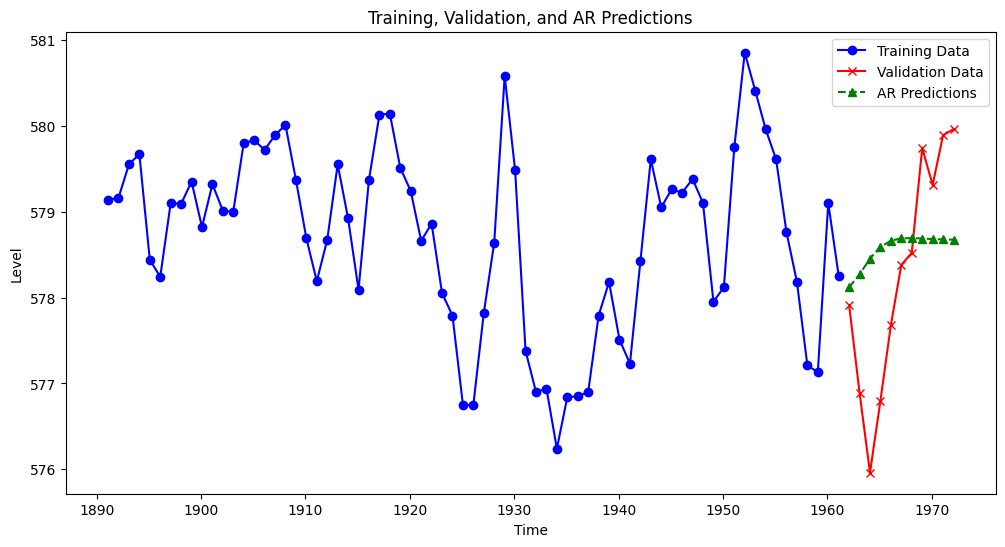

Mean Squared Error of AR model: 1.5533101788808004


In [ ]:
#Now you will use the best order selected above.
# Create and fit a model with the best order
best_ar_model = AutoReg(huron_train, lags=best_order, trend='c').fit()

# Compute the predictions made by this model on the validation data
ar_predictions = best_ar_model.forecast(len(huron_valid))

# Plot the training data, validation data, and predictions
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(huron_train.index, huron_train['Level'], marker='o', linestyle='-', color='b', label='Training Data')

# Plot validation data
plt.plot(huron_valid.index, huron_valid['Level'], marker='x', linestyle='-', color='r', label='Validation Data')

# Plot predictions
plt.plot(huron_valid.index, ar_predictions, marker='^', linestyle='--', color='g', label='AR Predictions')

# Add title and labels
plt.title('Training, Validation, and AR Predictions')
plt.xlabel('Time')
plt.ylabel('Level')

# Add legend
plt.legend()

# Show plot
plt.show()

# Compute the performance of this model
mse_ar = mean_squared_error(huron_valid, ar_predictions)
print(f'Mean Squared Error of AR model: {mse_ar}')

In [ ]:
Sur la base de l'analyse et des résultats obtenus à partir de différentes méthodes de prédiction, nous pouvons tirer les conclusions suivantes :

1. **Méthode naïve (dernière valeur observée)** :
- Cette méthode prédit la valeur suivante comme étant la dernière valeur observée dans l'ensemble d'entraînement.
- L'erreur quadratique moyenne (MSE) de cette méthode est relativement faible, ce qui indique qu'elle fonctionne raisonnablement bien pour cet ensemble de données.

2. **Moyenne de toutes les valeurs observées antérieures** :
- Cette méthode prédit la valeur suivante comme étant la moyenne de toutes les valeurs observées antérieurement dans l'ensemble d'entraînement.
- Les performances de cette méthode sont similaires à celles de la méthode naïve, mais elle peut ne pas capturer les tendances récentes aussi efficacement.

3. **Lissage exponentiel simple (SES)** :
- La méthode SES avec des paramètres optimisés fournit des prédictions très proches de la méthode naïve.
- L'erreur quadratique moyenne pour SES est légèrement supérieure à celle de la méthode naïve, ce qui indique qu'elle fonctionne de manière similaire mais pas meilleure.

4. **Modèle autorégressif (AR)** :
- Le modèle AR avec le meilleur ordre sélectionné à l'aide du critère d'information bayésien (BIC) offre la meilleure adéquation aux données d'apprentissage.
- Le MSE du modèle AR est le plus faible de toutes les méthodes, ce qui indique qu'il est le plus performant pour cet ensemble de données.

En résumé, le modèle AR surpasse les autres méthodes en termes de précision de prédiction pour l'ensemble de validation. La méthode naïve et la méthode SES fournissent des résultats similaires, mais le modèle AR capture plus efficacement les modèles sous-jacents dans les données.